In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load

In [2]:
obs = load('TSdataObs.joblib') 

In [5]:
AOData = xr.open_dataset('../../../../Data/AO_EU/EU.nc')
aoTS=AOData.EUVal
ao=aoTS[((aoTS.time.dt.month>11) | (aoTS.time.dt.month<2)) & 
        (aoTS.time.dt.year<2020)].sel(time=slice('1980-1-1','2018-12-31'))
#ao

In [6]:
FivedayMeanAO=aoTS.rolling(time=5).mean()

In [7]:
days=np.arange(62)

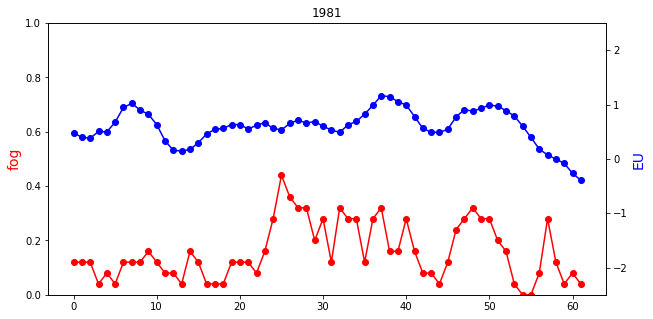

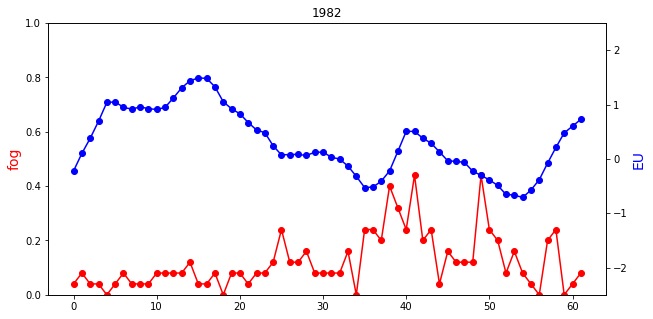

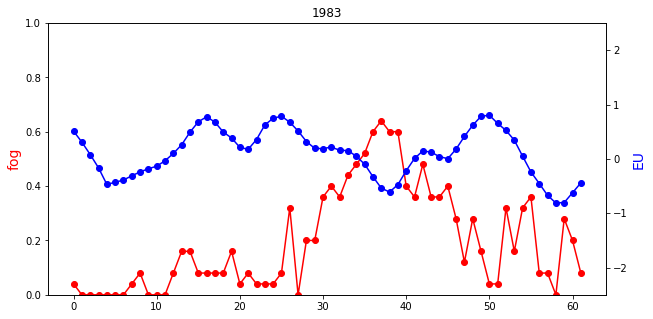

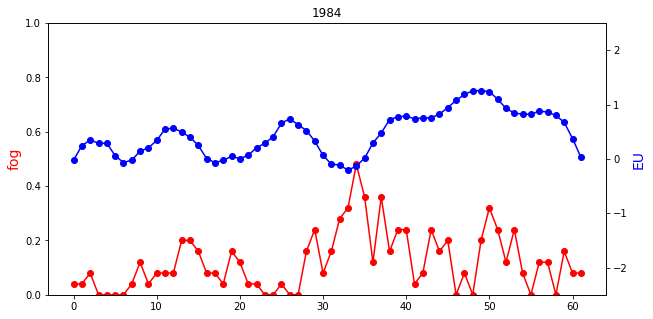

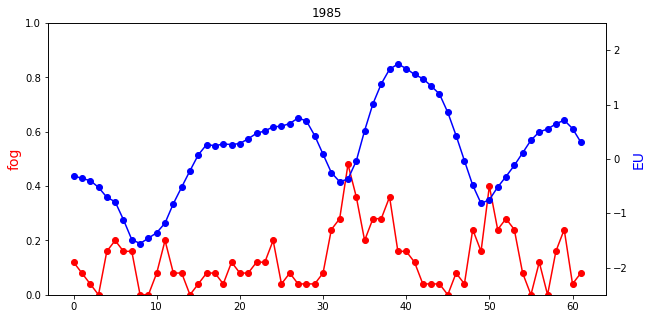

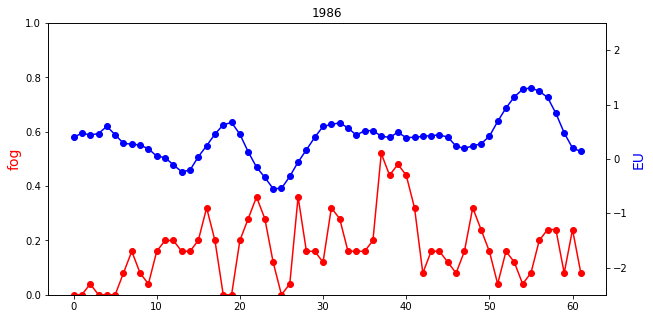

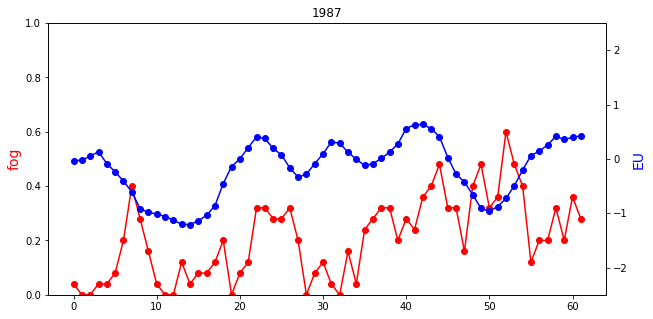

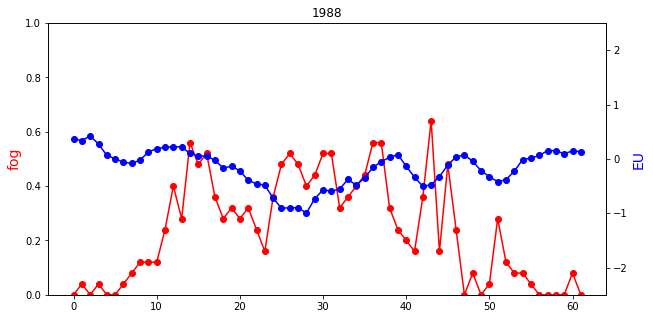

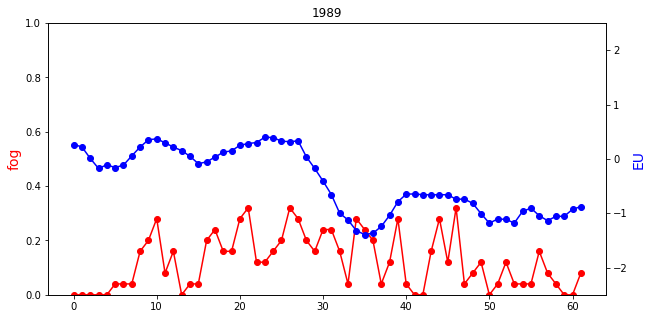

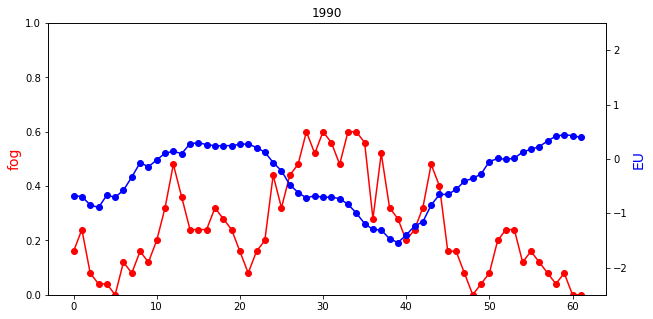

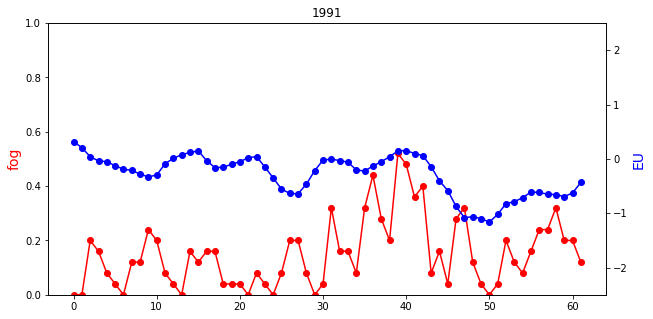

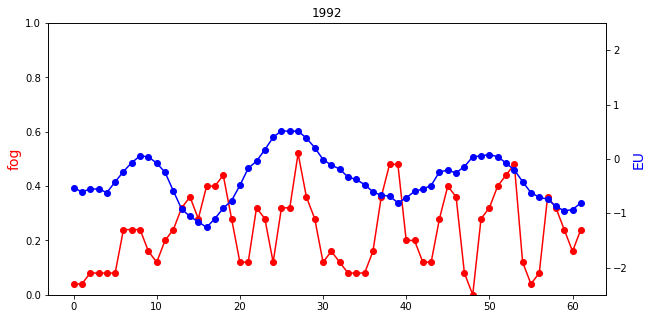

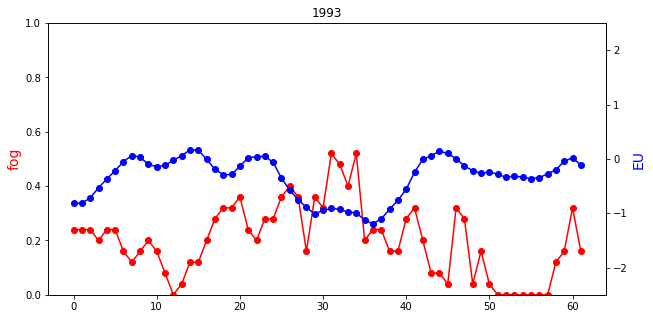

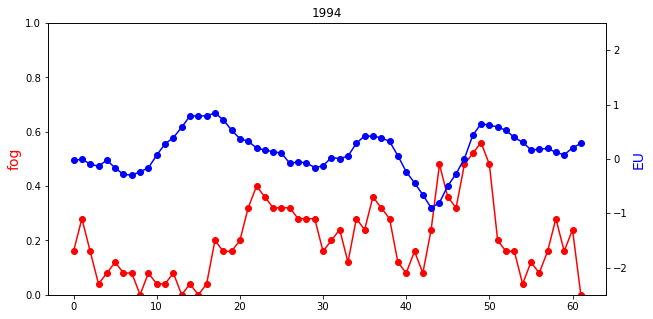

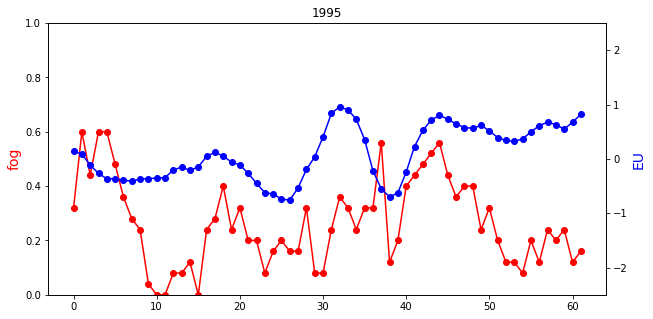

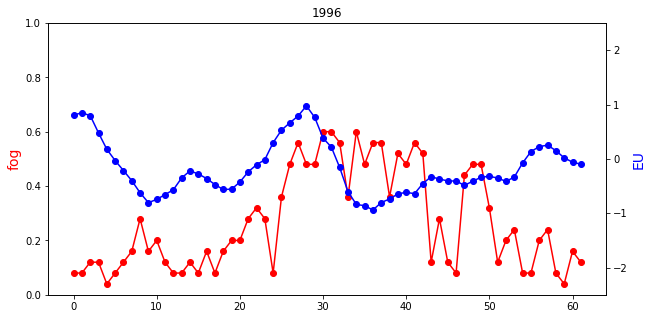

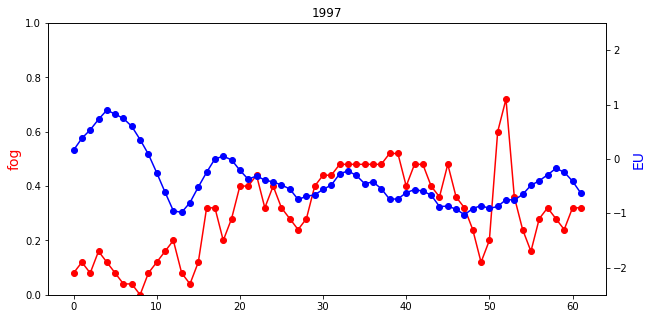

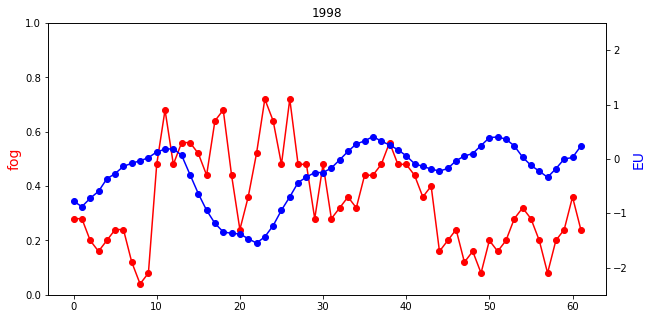

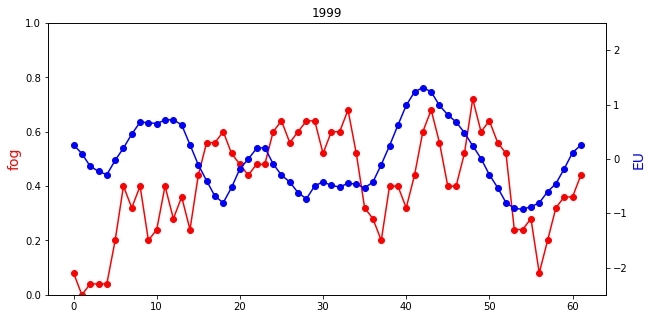

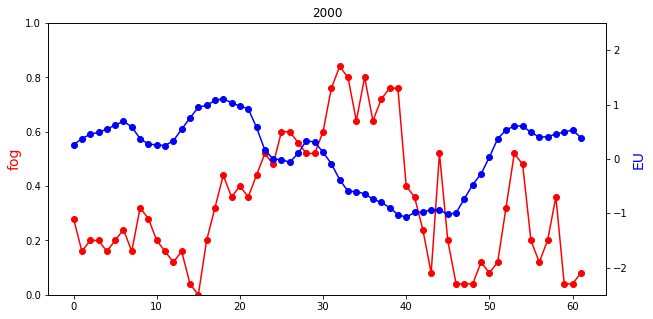

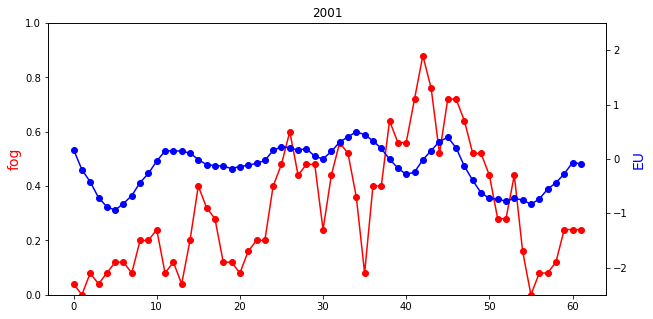

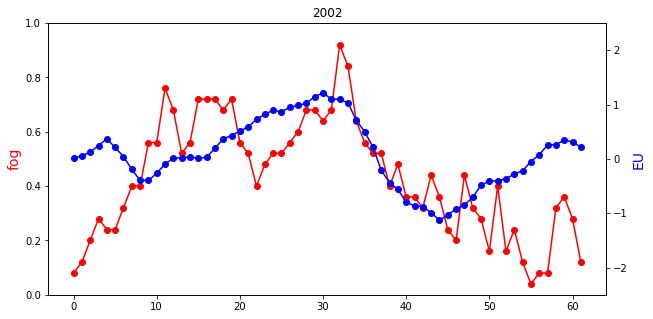

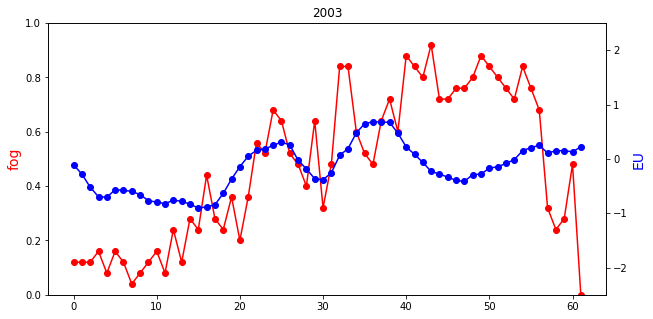

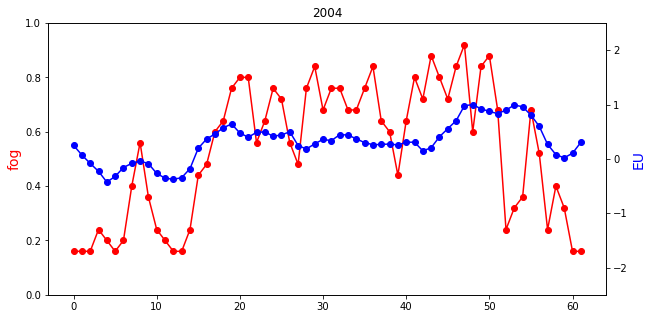

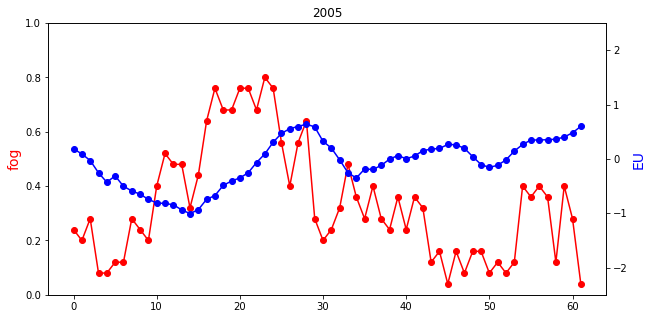

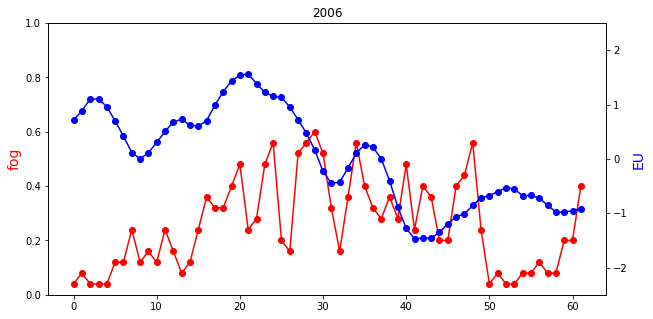

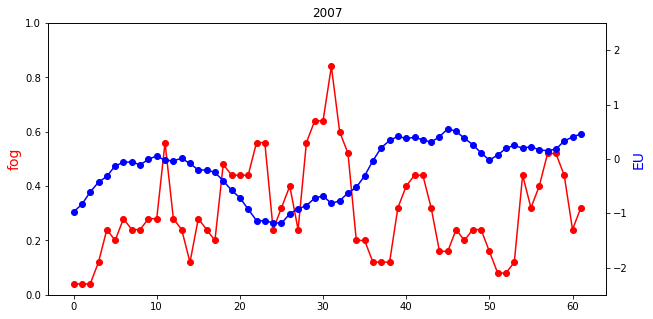

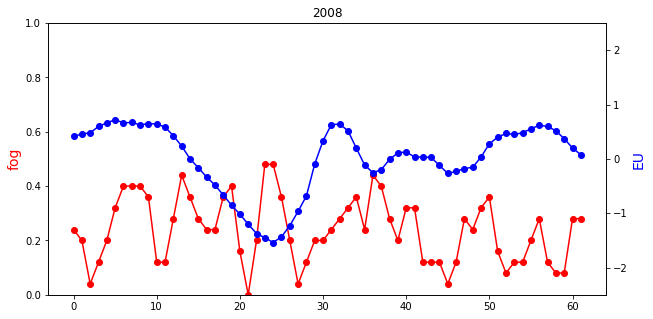

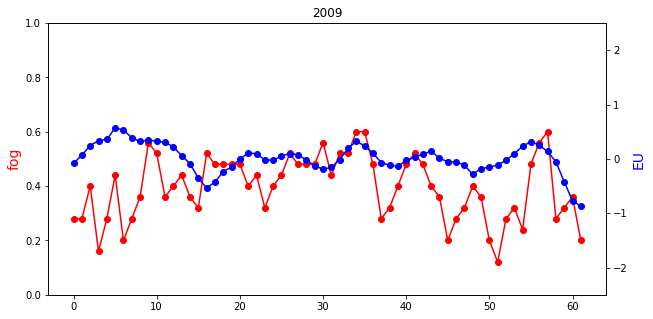

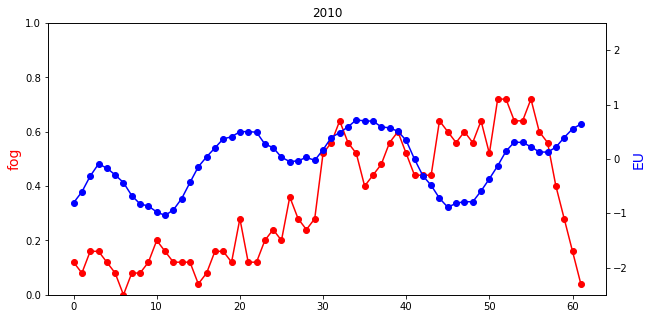

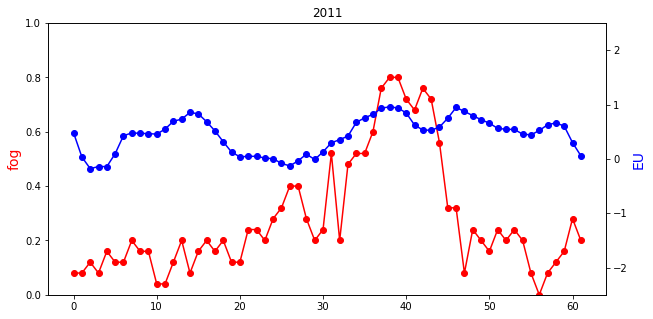

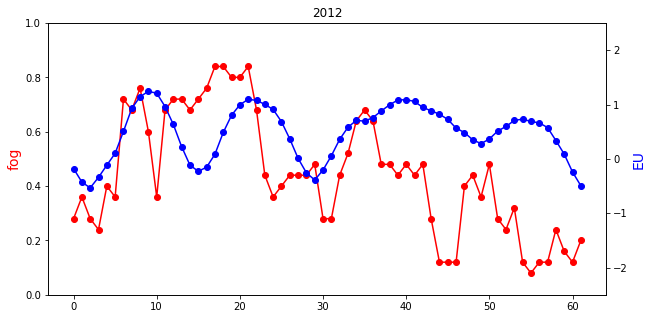

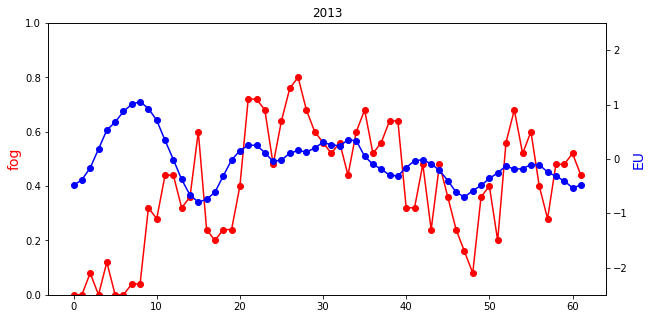

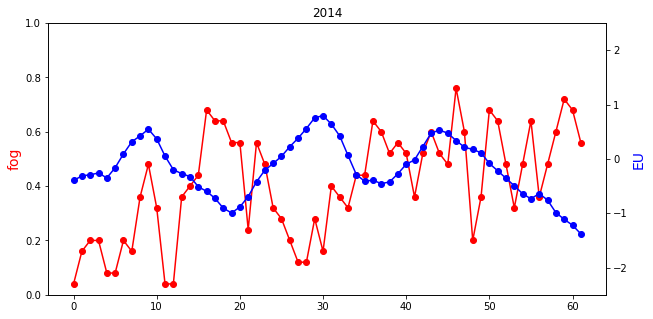

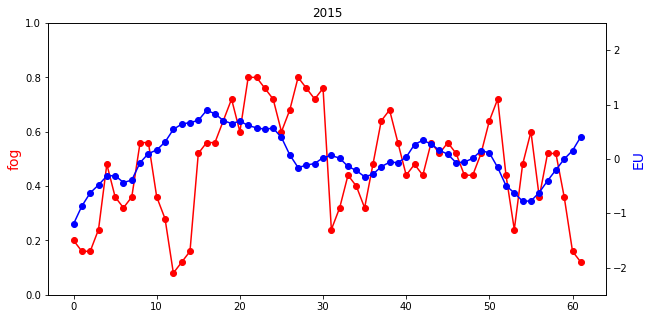

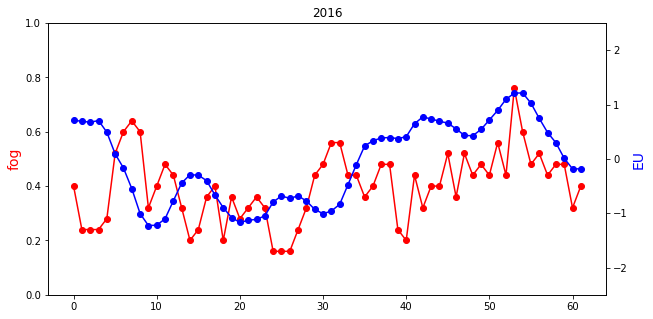

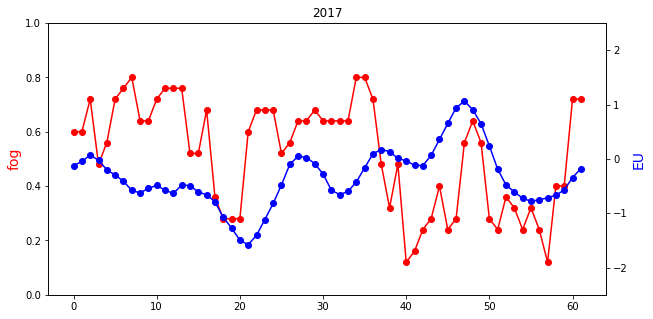

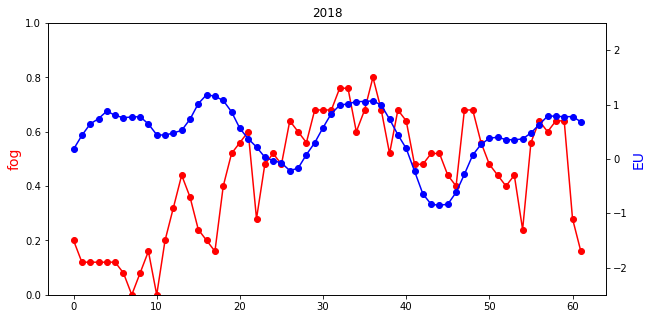

In [13]:
for yr in range(1981,2019,1):
    #print(yr)
    dStart=datetime.datetime(yr-1, 12, 1)
    #print(dStart)
    dEnd=datetime.datetime(yr, 1, 31)
    dEnd2=datetime.datetime(yr, 1, 31,9)
    #print(dEnd)
    obs1 = obs.sel(time=slice(dStart,dEnd))
    ao1  = FivedayMeanAO.sel(time=slice(dStart,dEnd2))
    fig,ax = plt.subplots(figsize=[10,5])
   # fig=plt.figure()
# make a plot
    ax.plot(days, obs1, color="red", marker="o")
# set x-axis label
    #ax.set_xlabel("year",fontsize=14)a
# set y-axis label
    ax.set_ylabel("fog",color="red",fontsize=14)
    ax.set_ylim([0, 1])
    ax2=ax.twinx()
    ax2.plot(days, ao1,color="blue",marker="o")
    ax2.set_ylim([-2.5, 2.5])
    ax2.set_ylabel("EU",color="blue",fontsize=14)
    plt.title(yr)
    plt.pause(0.05)